In [1]:
import pycbc.waveform
from pycbc.waveform import td_approximants
import os
import matplotlib.pyplot as plt
import pylab
from pycbc.filter import match
import numpy as np
from pycbc.psd import aLIGOZeroDetHighPower
from constants import *
from tqdm import tqdm
from pycbc.waveform import get_td_waveform
from multiprocess import Pool
import pickle
from hyp_td_waveform_v3 import get_hyp_waveform

In [2]:
f_lower = 10
delta_t = 1./2048
inc=pi/4
#distance=1e6*pc
order=3
f_lower = 10
matchfactor=0.99
u0=0
uf=0
phase_order = -1
dist=1;
q=1

In [3]:
def hypgws(M,b,e,method,f_lower='None'):
    hp,hc, uarr=get_hyp_waveform(M,q,e,b,delta_t,inc,dist*1e6*pc,order,method,flow=f_lower)
    return hc,uarr

In [4]:
def hypgw(M,b,e,f_lower):
    hp, hc = get_td_waveform(approximant='HyperbolicTD',
                                 mass1=M/2,
                                 mass2=M/2,
                                 delta_t=delta_t,
                                 hyp_eccentricity = e,
                                 b = b,
                                 inclination = inc,
                                 ui = u0,
                                 uf = uf,
                                 distance = dist,
                                 phase_order = phase_order,
                                 f_lower = f_lower )
    return hc


In [5]:
def compare_fig_l(M,b,e,method,f_lower):
    a1,uarr=hypgws(M,b,e,method,f_lower)
#     u0=uarr[0];uf=uarr[-1]
    uf=0;ui=0
    a2=hypgw(M,b,e,f_lower)
    fig=plt.figure(figsize=(6,5))
    plt.plot(a1.sample_times,a1,label='Subhajit')
    plt.plot(a2.sample_times,a2,label='Michael')
    plt.xlim([-0.2,0.2])
    plt.legend()
    plt.title('M='+str(M)+', b='+str(b)+', e='+str(e))
    return plt.show()

In [6]:
def compare_fig(M,b,e,method,f_lower):
    a1,uarr=hypgws(M,b,e,method)
#     u0=uarr[0];uf=uarr[-1]
    uf=0;ui=0
    a2=hypgw(M,b,e,0)
    fig=plt.figure(figsize=(6,5))
    plt.plot(a1.sample_times,a1,label='Subhajit')
    plt.plot(a2.sample_times,a2,label='Michael')
    #plt.xlim([-0.2,0.2])
    plt.legend()
    plt.title('M='+str(M)+', b='+str(b)+', e='+str(e))
    return plt.show()

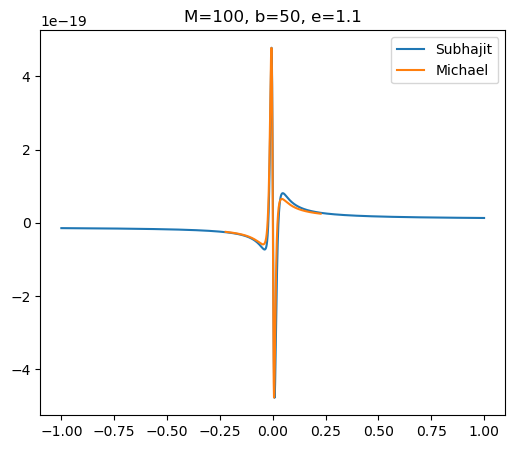

In [16]:
compare_fig(100,50,1.1,'dldt',0)

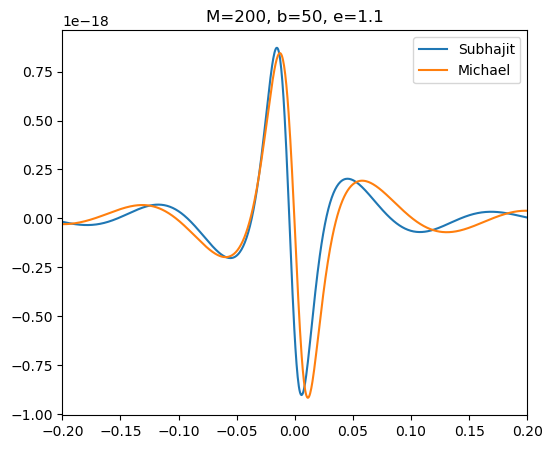

In [13]:
compare_fig_l(200,50,1.1,'dudt',10)